## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
TotalMice = len(combined_mouse_data["Mouse ID"].unique())
TotalMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data.loc[combined_mouse_data["Mouse ID"] == "g989",:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanTotalMice = combined_mouse_data[combined_mouse_data["Mouse ID"].isin(duplicate_id) == False]


In [6]:
# Checking the number of mice in the clean DataFrame.
NewTotalMice = len(CleanTotalMice["Mouse ID"].unique())
NewTotalMice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

RegimenAnalysis = CleanTotalMice.groupby(["Drug Regimen"])

Mean = RegimenAnalysis["Tumor Volume (mm3)"].mean()

Median = RegimenAnalysis["Tumor Volume (mm3)"].median()

Variance = RegimenAnalysis["Tumor Volume (mm3)"].var()

StdDeviation = RegimenAnalysis["Tumor Volume (mm3)"].std()

SEM = RegimenAnalysis["Tumor Volume (mm3)"].sem()

#New DataFrame with summary statistics
RegimenSummary = pd.DataFrame({ 
    "Mean": Mean, "Median": Median, 
    "Variance": Variance, 
    "Standard Deviation": StdDeviation,
    "SEM": SEM})

#Formatting
RegimenSummary['Mean'] = RegimenSummary['Mean'].astype(float).map("{:,.4f}".format)
RegimenSummary['Median'] = RegimenSummary['Median'].astype(float).map("{:,.4f}".format)
RegimenSummary['Variance'] = RegimenSummary['Variance'].astype(float).map("{:,.4f}".format)
RegimenSummary['Standard Deviation'] = RegimenSummary['Standard Deviation'].astype(float).map("{:,.4f}".format)
RegimenSummary['SEM'] = RegimenSummary['SEM'].astype(float).map("{:,.4f}".format)

RegimenSummary



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
CleanTotalMice.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Name')

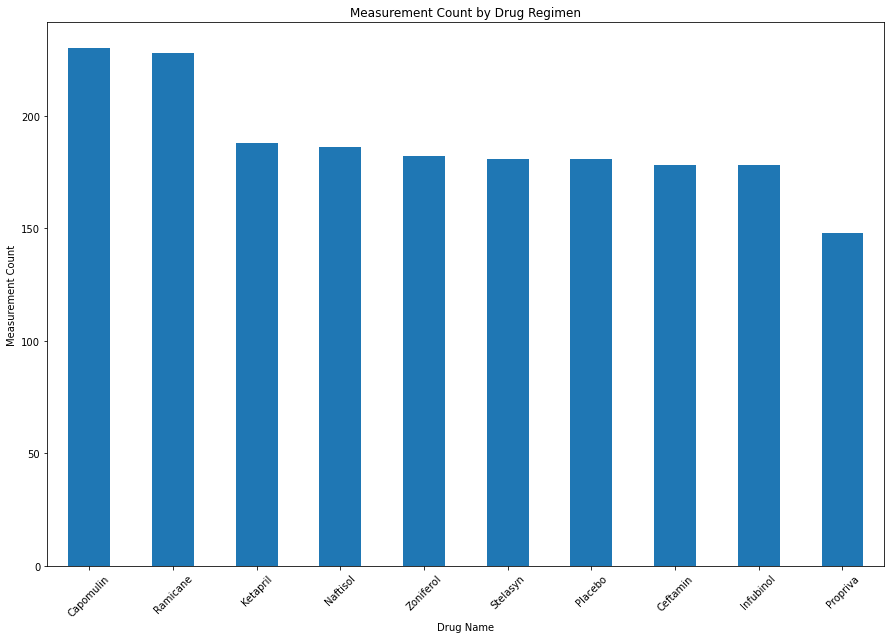

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
RegimenCountDF = CleanTotalMice["Drug Regimen"].value_counts()


RegimenCountDF.plot.bar(x= "Drug Regimen", y="Measurement Count", figsize=(15,10), rot=45, title="Measurement Count by Drug Regimen")

#Formatting
plt.ylabel("Measurement Count")
plt.xlabel("Drug Name")


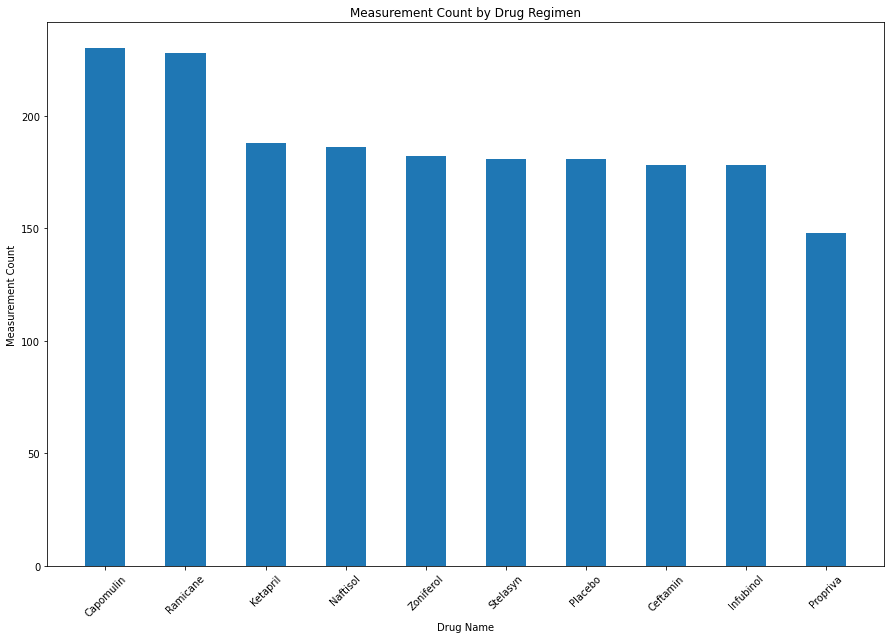

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
RegimenCountDF = CleanTotalMice["Drug Regimen"].value_counts()

y_axis = RegimenCountDF.values
x_axis = np.arange(len(RegimenCountDF))
Drugs = RegimenCountDF.index
fig= plt.figure(figsize = (15, 10))

plt.bar(Drugs, y_axis, width=0.5, align="center" )

#formatting
plt.title("Measurement Count by Drug Regimen")
plt.xlabel("Drug Name")
plt.xticks(rotation=45)
plt.ylabel("Measurement Count")

plt.show()

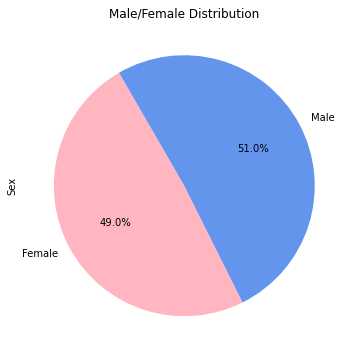

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MFDistributionDF = CleanTotalMice.groupby("Sex")
MFCount = MFDistributionDF["Sex"].count()
colors = ["lightpink", "cornflowerblue"]

MFPie = MFCount.plot(kind="pie", y="Sex", title="Male/Female Distribution", 
                     figsize=(10,6), autopct = '%1.1f%%', colors=colors, startangle=120)
plt.show()

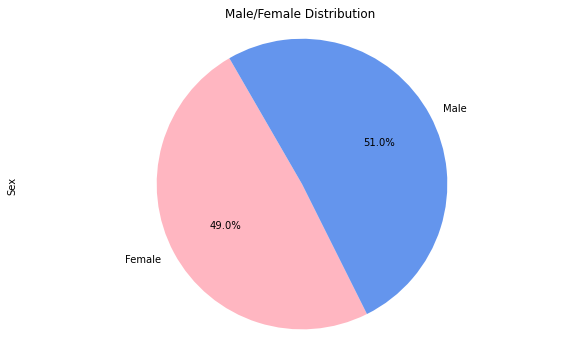

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MFDistributionDF = CleanTotalMice.groupby("Sex")
MFCount = MFDistributionDF["Sex"].value_counts()
colors = ["lightpink", "cornflowerblue"]
labels = ["Female", "Male"]
fig= plt.figure(figsize = (10, 6))
plt.title("Male/Female Distribution")
plt.ylabel("Sex")

plt.pie(MFCount, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=120)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

RegimensOfInterest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

TerminalTumorVolumes = CleanTotalMice[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]] \
    [CleanTotalMice["Drug Regimen"].isin(RegimensOfInterest)] \
    .sort_values(by=["Drug Regimen", "Mouse ID", "Timepoint"]) \
    .groupby(["Drug Regimen", "Mouse ID"]) \
    .tail(1)

TerminalTumorVolumes



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
309,Capomulin,b128,45,38.982878
299,Capomulin,b742,45,38.939633
64,Capomulin,f966,20,30.485985
244,Capomulin,g288,45,37.074024
360,Capomulin,g316,45,40.159220
...,...,...,...,...
59,Ramicane,s508,45,30.276232
410,Ramicane,u196,45,40.667713
449,Ramicane,w678,5,43.166373
453,Ramicane,y449,15,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
for regimen in RegimensOfInterest:
    quartiles = CleanTotalMice[CleanTotalMice["Drug Regimen"] == regimen] \
        ["Tumor Volume (mm3)"] \
        .quantile([.25,.5,.75])

    lowerq = round(quartiles[0.25],4)
    upperq = round(quartiles[0.75],4)
    iqr = round(upperq-lowerq,4)
    lower_bound = round(lowerq - (1.5*iqr),4)
    upper_bound = round(upperq + (1.5*iqr),4)
    
    print(f"Quantative Analysis for {regimen}")
    print(f"    Lower quartile: {lowerq}")
    print(f"    Upper quartile: {upperq}")
    print(f"    Interquartile range: {iqr}")
    print(f"    Values below {lower_bound} could be outliers.")
    print(f"    Values above {upper_bound} could be outliers.\n")
    

Quantative Analysis for Capomulin
    Lower quartile: 37.6859
    Upper quartile: 45.0
    Interquartile range: 7.3141
    Values below 26.7147 could be outliers.
    Values above 55.9712 could be outliers.

Quantative Analysis for Ramicane
    Lower quartile: 36.6746
    Upper quartile: 45.0
    Interquartile range: 8.3254
    Values below 24.1865 could be outliers.
    Values above 57.4881 could be outliers.

Quantative Analysis for Infubinol
    Lower quartile: 47.3124
    Upper quartile: 57.3144
    Interquartile range: 10.002
    Values below 32.3094 could be outliers.
    Values above 72.3174 could be outliers.

Quantative Analysis for Ceftamin
    Lower quartile: 47.2084
    Upper quartile: 56.8014
    Interquartile range: 9.593
    Values below 32.8189 could be outliers.
    Values above 71.1909 could be outliers.



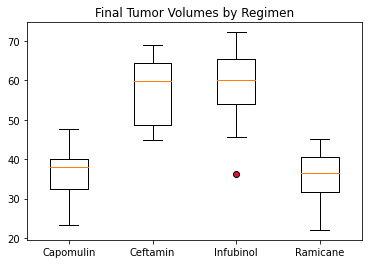

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = TerminalTumorVolumes.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)

redflier = dict(markerfacecolor="crimson")
fig1 = plt.subplot()
fig1.set_title("Final Tumor Volumes by Regimen")
fig1.boxplot(data, labels=data.keys(), flierprops=redflier)

plt.show()

## Line and Scatter Plots

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



           Tumor Volume (mm3)
Timepoint                    
0                   45.000000
5                   44.022752
10                  44.502042
15                  45.216743
20                  45.933322
25                  46.809225
30                  44.221480
35                  44.702833
40                  45.565821
45                  40.159220


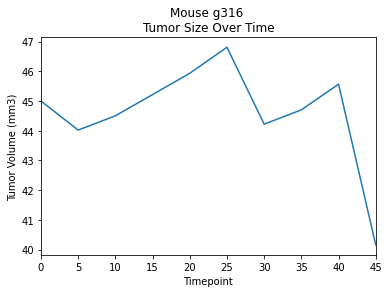

In [16]:
ExampleVolOverTime = CleanTotalMice[CleanTotalMice["Mouse ID"] == "g316"] \
    [["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint").apply(list)

print(ExampleVolOverTime)

plt.plot(ExampleVolOverTime)
plt.xlim(0,45)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse g316 \nTumor Size Over Time")
plt.show()

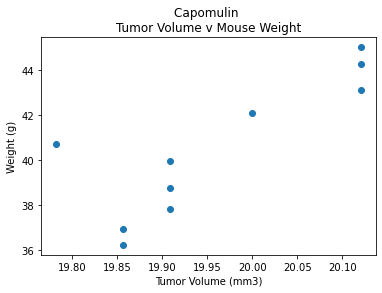

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group by drug regimen then capomulin

TumorVolvMouseWeight = CleanTotalMice.loc[CleanTotalMice["Drug Regimen"] == "Capomulin"] \
    .groupby(CleanTotalMice["Timepoint"]).agg({"Tumor Volume (mm3)": ["mean"], "Weight (g)":["mean"]})

TumorVolvMouseWeight.columns = ["Average Tumor Volume (mm3)", "Average Weight (g)"]


x_values = TumorVolvMouseWeight["Average Weight (g)"].astype("float")
y_values = TumorVolvMouseWeight["Average Tumor Volume (mm3)"].astype("float")

plt.scatter(x_values, y_values)

plt.title("Capomulin \nTumor Volume v Mouse Weight")
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

R squared: 0.6735964997067523


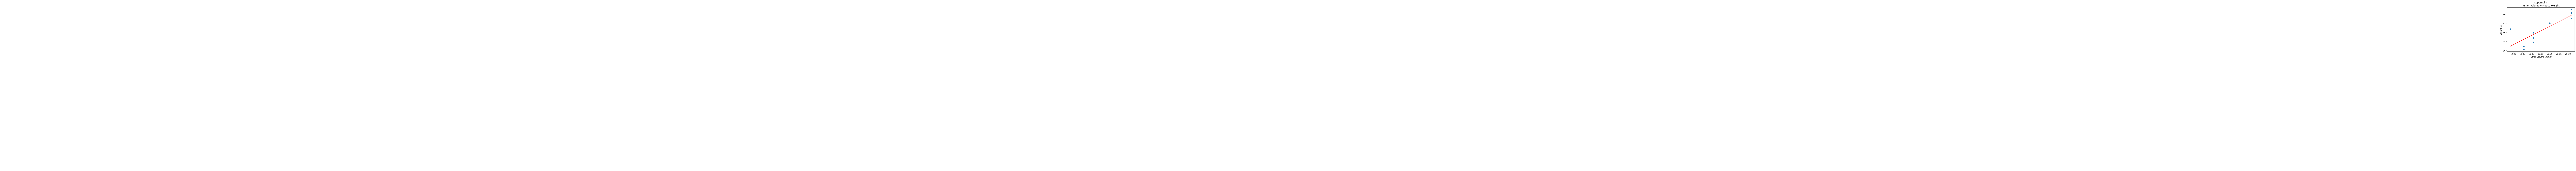

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_values = TumorVolvMouseWeight["Average Weight (g)"].astype("float")
y_values = TumorVolvMouseWeight["Average Tumor Volume (mm3)"].astype("float")

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Capomulin \nTumor Volume v Mouse Weight")
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
print(f"R squared: {rvalue**2}")

plt.show()
